In [2]:

from nanopyx.core.transform.new_error_map import ErrorMap
from skimage import io
import numpy as np

def normalization(data, desired_accuracy=np.float32):
    return (data - data.min()) / (data.max() - data.min() + 1e-10).astype(
        desired_accuracy
    )

def read_image(filename, desired_accuracy=np.float32):
    return normalization(io.imread(filename), desired_accuracy=desired_accuracy)


(502, 502)
(1004, 1004)
(1004, 1004)


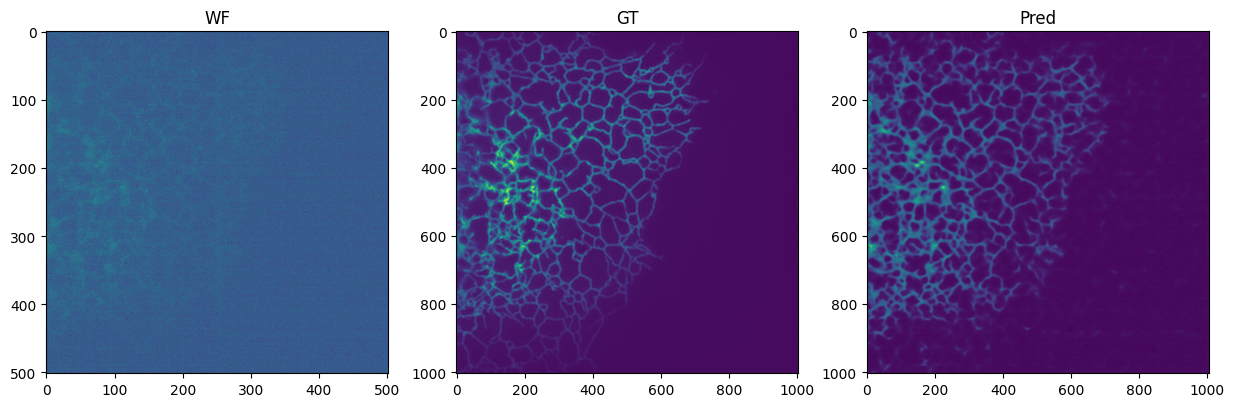

In [17]:
wf_img = read_image('../datasets/ER/test/test_wf/level_01/001.tif')
gt_img = read_image('../datasets/ER/test/test_gt/level_06/001.tif')
predicted_img = read_image('results/ER/rcan/scaleNone/epc200_btch4_lr0.001_optim-adam_lrsched-OneCycle_seed666/predicted_images/001.tif')

print(wf_img.shape)
print(gt_img.shape)
print(predicted_img.shape)

from matplotlib import pyplot as plt 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(wf_img)
plt.title('WF')
plt.subplot(1,3,2)
plt.imshow(gt_img)
plt.title('GT')
plt.subplot(1,3,3)
plt.imshow(predicted_img)
plt.title('Pred');

In [14]:
error_map = ErrorMap()
error_map.optimise(wf_img, gt_img)
print(f'df=wf & sr=gt -> RSE:{error_map.getRSE()} RSP:{error_map.getRSP()}')

error_map = ErrorMap()
error_map.optimise(predicted_img, gt_img)
print(f'df=pred & sr=gt -> RSE:{error_map.getRSE()} RSP:{error_map.getRSP()}')

error_map = ErrorMap()
error_map.optimise(wf_img, predicted_img)
print(f'df=wf & sr=pred -> RSE:{error_map.getRSE()} RSP:{error_map.getRSP()}')

df=wf & sr=gt -> RSE:0.02828923612833023 RSP:0.5095328688621521
df=pred & sr=gt -> RSE:0.0 RSP:0.0
df=wf & sr=pred -> RSE:0.027469128370285034 RSP:0.5494760870933533


df=pred & sr=gt -> RSE:0.0 RSP:0.0


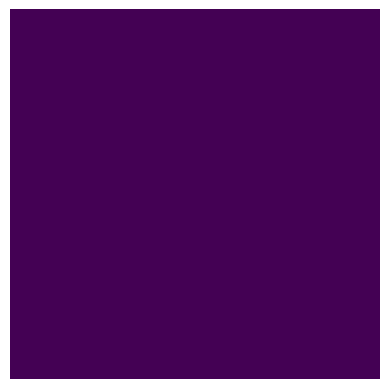

In [15]:
error_map = ErrorMap()
error_map.optimise(predicted_img, gt_img)
print(f'df=pred & sr=gt -> RSE:{error_map.getRSE()} RSP:{error_map.getRSP()}')


errormap = np.array(error_map.imRSE)
plt.imshow(errormap)
plt.axis("off")
plt.show()